In [2]:
#Importar librerías
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
#from numpy.linalg import matrix_power
# matrix_power(A,5)



In [79]:
#Importar datos 
data01 = pd.read_csv('EURUSD_M1_202001.csv',header=None)#,usecols=(0,1,5)  
data02 = pd.read_csv('EURUSD_M1_202002.csv',header=None)#,usecols=(0,1,5)
data03 = pd.read_csv('EURUSD_M1_202003.csv',header=None)#,usecols=(0,1,5)
data04 = pd.read_csv('EURUSD_M1_202004.csv',header=None)#,usecols=(0,1,5)
data05 = pd.read_csv('EURUSD_M1_202005.csv',header=None)#,usecols=(0,1,5)
data06 = pd.read_csv('EURUSD_M1_202006.csv',header=None)#,usecols=(0,1,5)
data07 = pd.read_csv('EURUSD_M1_202007.csv',header=None)#,usecols=(0,1,5)
data08 = pd.read_csv('EURUSD_M1_202008.csv',header=None)#,usecols=(0,1,5)
data09 = pd.read_csv('EURUSD_M1_202009.csv',header=None)#,usecols=(0,1,5)
data10 = pd.read_csv('EURUSD_M1_202010.csv',header=None)#,usecols=(0,1,5)

#Importar datos de prueba
data11 = pd.read_csv('EURUSD_M1_202011.csv',header=None)#,usecols=(0,1,5)
data12 = pd.read_csv('EURUSD_M1_202012.csv',header=None)#,usecols=(0,1,5)

In [17]:
#data = pd.concat([data08,data09,data10])
def align(data):
    data.columns = ['Day','Minute','Open','High','Low','Close','Volume'] #Cambiar nombre de columnas
    data['Time']= data['Day'].str.cat(data['Minute'], sep =' ') #Unir datos de día y minuto
    data['Time'] = pd.to_datetime(data['Time']) #Data a modo DateTime
    data.pop('Day') #Eliminar columna día
    data.pop('Minute') #Eliminar columna de minutos
    data = data.set_index('Time') #Establecer columna de tiempo como índice
    data.pop('Volume')
    return data

def align2(data):
    data.columns = ['Time','Open','High','Low','Close','Volume'] #Cambiar nombre de columnas
    data['Time'] = pd.to_datetime(data['Time']) #Data a modo DateTime
    data = data.set_index('Time') #Establecer columna de tiempo como índice
    data.pop('Volume')
    return data

In [22]:
#Concatenar datos
data = pd.concat([data01,data02,data03,data04,data05,data06,data07,data08,data09,data10])
data = align(data)
data.head()

,Open,High,Low,Close
Time,,,,
2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120
2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135
2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139
2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122
2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125


In [23]:
#Rendimientos y tamaños de las velas
#data['Return'] = data.Close/data.Open -1
#data['Size'] = data.High - data.Low
#data = data.dropna()
# data

In [24]:
# RSI
delta = data.Close.diff(1)
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down>0] = 0

#Period
period = 50
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

#RS
RS = AVG_Gain / AVG_Loss

RSI = 100.0 - (100.0 / (1.0 + RS))

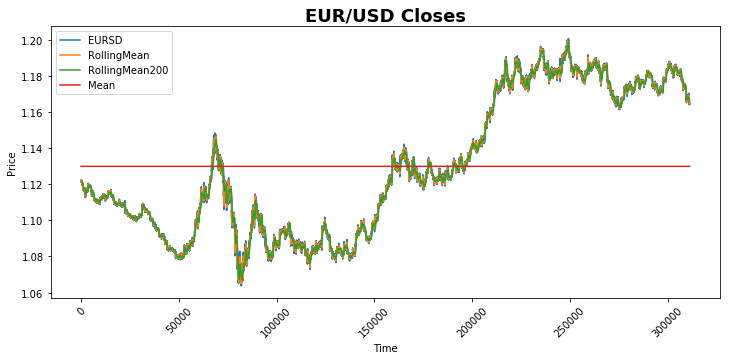

In [27]:
#Graficar los datos
plt.figure(figsize=(12,5))
plt.plot(data.Close.values,label='EURSD')

plt.plot(np.arange(len(data)),data.Close.rolling(50).mean(),label='RollingMean')
plt.plot(np.arange(len(data)),data.Close.rolling(500).mean(),label='RollingMean200')

plt.plot(np.arange(len(data)),np.ones(len(data))*data.Close.mean(),label='Mean')
plt.title('EUR/USD Closes',fontdict={'weight':'bold','fontsize':'18'})
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')
# plt.ylim(1.175,1.2)
#plt.xlim(24000,34000)
plt.legend()
plt.show()

#Fig2
#plt.figure(figsize=(12,5))
#plt.plot(RSI.values, label='RSI')
#plt.title('EUR/USD RSI',fontdict={'weight':'bold','fontsize':'18'})
#plt.xticks(rotation=45)
#plt.xlabel('Time')
#plt.ylabel('RSI')
## plt.ylim(1.175,1.2)
#plt.xlim(24000,34000)
#plt.legend()
#plt.show()

In [411]:
data2 = pd.DataFrame(data['Close'])
data2['RMShort'] = data2.Close.rolling(50).mean()
data2['RMSLong'] = data2.Close.rolling(500).mean()
# data2 = data2.dropna()

In [412]:
a = []
for i in range(len(data2)):
    if data2.RMShort[i] > data2.RMSLong[i]:
        a.append(1)
    else:
        a.append(0)


In [413]:
len(data2), len(a)

(93043, 93043)

In [444]:
b = np.arange(len(data2))
c = []
d = []
for k in range(1,len(data2)):
    if a[k] > a[k-1]:
        c.append(k)
    elif a[k] < a[k-1]:
        d.append(k)

In [440]:
TH = 0.002
for i in range(len(d)):
    series = np.array(data2.Close[c[i]:d[i]+1])
    for k in range(len(series)):
        if series[0] - series[k] > TH:
            d[i] = d[i] - (len(series)-k-1)
            break

In [445]:
Compra = data2.Close[c].values
Venta = data2.Close[d].values

In [528]:
x = (Compra - Venta)
per = x[x<0]
gain = x[x>0]
per.mean(), gain.mean()

(-0.002190980392156853, 0.0010411818181818406)

In [447]:
x.sum()

0.0027900000000029568

In [94]:
#Graficar los datos
plt.figure(figsize=(12,5))

plt.scatter(c, data2.Close.values[c], color='darkblue')
plt.scatter(d, data2.Close.values[d], color='darkgreen')
plt.plot(data2.Close.values,label='EURSD',color='lightblue')


plt.title('EUR/USD Closes',fontdict={'weight':'bold','fontsize':'18'})
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')


plt.legend()
plt.xlim(0,1000)

plt.show()

NameError: name 'c' is not defined

<Figure size 864x360 with 0 Axes>

### **Func**

In [275]:
def estrategia(data,TH,RMS,RML,M):
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.rolling(RMS).mean()
    data2['RMSLong'] = data2.Close.rolling(RML).mean()

    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]
    
    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)
            
    for i in range(len(d)):
        series = np.array(data2.Close[c[i]:d[i]+1])
        for k in range(len(series)):
            if series[0] - series[k] >= TH or series[k] - series[0] >= M*TH:
                d[i] = d[i] - (len(series)-k-1)
                break

    Compra = data2.Close[c].values
    Venta = data2.Close[d].values
    
    if len(Compra)==len(Venta):
        x = (Venta - Compra)
    else:
        x = (Venta - Compra[:-1])
        
    return x.sum(), x, c,d,Compra,Venta

In [142]:
a_ = np.arange(0,10,1)
for i in a_:
    if i<2 or i>8:
        print(i)

0
1
9


In [174]:
#Multiples backtestings

#Datos a tomar
#data

#Threshold
TH_ = np.arange(0.0003,0.003,0.0003)

#Rolling Mean Short
RMS_ = np.linspace(10,100,10).astype(int)

#Rolling Mean long
RML_ = np.arange(150,650,50).astype(int)

#Multiplicador de StopLoss para TakeProfit
M_ = [2,3]

In [265]:
RML_

array([150, 200, 250, 300, 350, 400, 450, 500, 550, 600])

In [211]:
#Orden y valores
#índice
Orden = ['SL_%s'%round(a,5)+'_RMS_%s'%b+'_RML_%s'%c+'_TP_%s'%round((a*m),5) for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#TH
OrdenTH = [a for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#RMS
OrdenRMS = [b for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#RML
OrdenRML = [c for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#StopLoss
OrdenSL = [round((a*m),5) for a in TH_ for b in RMS_ for c in RML_ for m in M_]

In [213]:
#Res = [estrategia(data,a,b,c,m) for a in TH_ for b in RMS_ for c in RML_ for m in M_]
Res

[-0.05641999999999814,
 -0.05117999999999978,
 -0.012370000000001768,
 -0.007020000000005355,
 -0.02715999999999874,
 -0.04417999999999678,
 -0.03546000000000782,
 -0.04043000000000685,
 -0.0339200000000035,
 -0.031590000000002005,
 -0.02940999999999061,
 -0.027609999999990142,
 -0.0007599999999943208,
 -0.003619999999997736,
 -0.005739999999992973,
 0.006820000000005155,
 0.008009999999998518,
 0.015899999999994696,
 -0.014980000000003102,
 -0.012320000000004994,
 -0.01933000000000762,
 -0.009430000000007599,
 -0.005780000000004337,
 -0.017360000000003817,
 -0.0490500000000047,
 -0.041910000000006775,
 -0.03861999999999277,
 -0.03728999999999694,
 -0.03156000000000092,
 -0.03750000000000231,
 -0.018650000000001166,
 -0.01621000000000561,
 -0.00649999999999995,
 0.005649999999999711,
 0.020419999999998772,
 0.01991999999999816,
 -9.000000000480846e-05,
 -0.008480000000003596,
 0.0020299999999950913,
 -0.02095000000000491,
 -0.03694999999999782,
 -0.034370000000000234,
 -0.0434699999999

In [214]:
import pickle

#Guardar resultados
#pickle.dump(Res,open('Res.sav','wb'))

In [49]:
#Cargar resultados
#Res = pickle.load(open('Res.sav', 'rb'))

In [249]:
dfRes = pd.DataFrame({'Backtesting':Res,'TH':OrdenTH,'RMS':OrdenRMS,'RML':OrdenRML, 'TakeProfit':OrdenSL}, index = Orden)
dfRes.head()

,Backtesting,TH,RMS,RML,TakeProfit
SL_0.0003_RMS_10_RML_150_TP_0.0006,-0.05642,0.0003,10,150,0.0006
SL_0.0003_RMS_10_RML_150_TP_0.0009,-0.05118,0.0003,10,150,0.0009
SL_0.0003_RMS_10_RML_200_TP_0.0006,-0.01237,0.0003,10,200,0.0006
SL_0.0003_RMS_10_RML_200_TP_0.0009,-0.00702,0.0003,10,200,0.0009
SL_0.0003_RMS_10_RML_250_TP_0.0006,-0.02716,0.0003,10,250,0.0006


In [255]:
#Visualizar los mejores
#Num de mejores a tomar
n = 10
As = dfRes.sort_values(by=['Backtesting'], ascending=False).head(n)
As

,Backtesting,TH,RMS,RML,TakeProfit
SL_0.0024_RMS_50_RML_400_TP_0.0072,0.14162,0.0024,50,400,0.0072
SL_0.0027_RMS_50_RML_400_TP_0.0081,0.12862,0.0027,50,400,0.0081
SL_0.0024_RMS_60_RML_450_TP_0.0072,0.12540,0.0024,60,450,0.0072
SL_0.0024_RMS_50_RML_400_TP_0.0048,0.12143,0.0024,50,400,0.0048
SL_0.0012_RMS_30_RML_400_TP_0.0036,0.12091,0.0012,30,400,0.0036
SL_0.0015_RMS_50_RML_400_TP_0.0045,0.11750,0.0015,50,400,0.0045
SL_0.003_RMS_50_RML_400_TP_0.009,0.11698,0.0030,50,400,0.0090
SL_0.0018_RMS_50_RML_400_TP_0.0054,0.11584,0.0018,50,400,0.0054
SL_0.0027_RMS_50_RML_400_TP_0.0054,0.11534,0.0027,50,400,0.0054
SL_0.0027_RMS_60_RML_250_TP_0.0081,0.11522,0.0027,60,250,0.0081


### **Probar Resultados**

In [256]:
#Transformar datos de prueba
data_test = pd.concat([data11,data12])
data_test = align2(data_test)

In [257]:
#Mejores Valores Obtenidos
B_TH = As.TH.values #Threshold (StopLoss)
B_RMS = As.RMS.values #Rolling Mean Short
B_RML = As.RML.values #Rolling Mean Long
B_TP = As.TakeProfit.values #Take Profit
B_Index = As.index.values

In [258]:
#Mejores resultados
Best = []
for i in range(len(B_TH)):
    Best.append(estrategia(data_test, B_TH[i],B_RMS[i],B_RML[i],B_TP[i]))
    

In [276]:
a1,a2, c2,d2,Compra2,Venta2 = estrategia(data_test,.0024,50,400,.0072)

In [279]:
Compra2, Venta2

(array([1.164  , 1.16462, 1.16339, 1.1718 , 1.16667, 1.17149, 1.17275,
        1.18273, 1.18273, 1.18257, 1.18243, 1.18768, 1.18817, 1.18864,
        1.18951, 1.18863, 1.18227, 1.18213, 1.18397, 1.18135, 1.18172,
        1.17686, 1.17866, 1.18116, 1.18118, 1.18086, 1.18072, 1.18068,
        1.18095, 1.18088, 1.1822 , 1.18592, 1.18369, 1.1868 , 1.18614,
        1.18681, 1.18671, 1.18471, 1.18334, 1.18779, 1.18708, 1.18707,
        1.18586, 1.18576, 1.18592, 1.18776, 1.18393, 1.18441, 1.1877 ,
        1.19042, 1.1908 , 1.19149, 1.1915 , 1.19162, 1.19178, 1.19054,
        1.1914 , 1.19141, 1.19263, 1.19692, 1.19721, 1.19862, 1.19579,
        1.19797, 1.20758, 1.20852, 1.20672, 1.21138, 1.2126 , 1.21476,
        1.21466, 1.21509, 1.21294, 1.21075, 1.21123, 1.21252, 1.21163,
        1.21259, 1.21072, 1.20811, 1.20983, 1.20929, 1.21047, 1.21184,
        1.21165, 1.21159, 1.21374, 1.21298, 1.21557, 1.21501, 1.21483,
        1.21585, 1.21541, 1.21543, 1.21566, 1.21959, 1.21972, 1.21951,
      

In [259]:
Best

[0.00411000000000139,
 0.004720000000001612,
 -0.00046000000000057106,
 0.00411000000000139,
 0.0012400000000016842,
 0.0036500000000010413,
 0.004720000000001612,
 0.003300000000000969,
 0.00411000000000139,
 0.006949999999999568]

In [260]:
#Mostrar Resultados
dfBest = pd.DataFrame({'Backtesting':Best,'TH':B_TH,'RMS':B_RMS,'RML':B_RML, 'TakeProfit':B_TP}, index = B_Index)
dfBest

,Backtesting,TH,RMS,RML,TakeProfit
SL_0.0024_RMS_50_RML_400_TP_0.0072,0.00411,0.0024,50,400,0.0072
SL_0.0027_RMS_50_RML_400_TP_0.0081,0.00472,0.0027,50,400,0.0081
SL_0.0024_RMS_60_RML_450_TP_0.0072,-0.00046,0.0024,60,450,0.0072
SL_0.0024_RMS_50_RML_400_TP_0.0048,0.00411,0.0024,50,400,0.0048
SL_0.0012_RMS_30_RML_400_TP_0.0036,0.00124,0.0012,30,400,0.0036
SL_0.0015_RMS_50_RML_400_TP_0.0045,0.00365,0.0015,50,400,0.0045
SL_0.003_RMS_50_RML_400_TP_0.009,0.00472,0.0030,50,400,0.0090
SL_0.0018_RMS_50_RML_400_TP_0.0054,0.00330,0.0018,50,400,0.0054
SL_0.0027_RMS_50_RML_400_TP_0.0054,0.00411,0.0027,50,400,0.0054
SL_0.0027_RMS_60_RML_250_TP_0.0081,0.00695,0.0027,60,250,0.0081


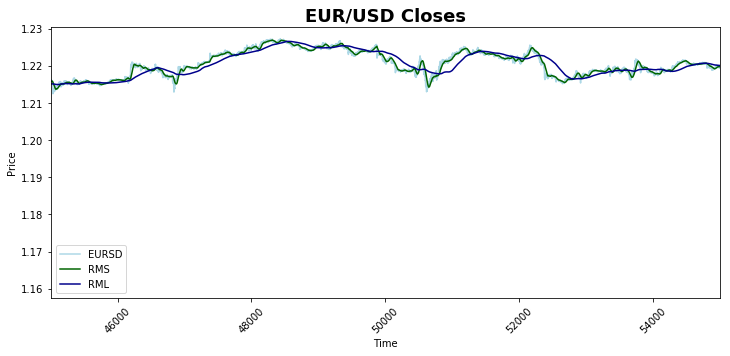

In [262]:
#Graficar los datos
plt.figure(figsize=(12,5))

#plt.scatter(c, data2.Close.values[c], color='darkblue')
#plt.scatter(d, data2.Close.values[d], color='darkgreen')
plt.plot(data_test.Close.values,label='EURSD',color='lightblue')
plt.plot(data_test.Close.rolling(50).mean().values,label='RMS',color='darkgreen')
plt.plot(data_test.Close.rolling(400).mean().values,label='RML',color='darkblue')


plt.title('EUR/USD Closes',fontdict={'weight':'bold','fontsize':'18'})
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')


plt.legend()
plt.xlim(45000,55000)

plt.show()

### **Otro**

In [473]:
RMS=50
RML=500

data2 = pd.DataFrame(data3['Close'])
data2['RMShort'] = data2.Close.rolling(RMS).mean()
data2['RMSLong'] = data2.Close.rolling(RML).mean()

a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]
c = []
d = []
for k in range(1,len(data2)):
    if a[k] > a[k-1]:
        c.append(k)
    elif a[k] < a[k-1]:
        d.append(k)

In [159]:
#Create the transition matrix

TM = pd.DataFrame({'U':[0,0,0,0,0,0,0,0,0],
                   'D':[0,0,0,0,0,0,0,0,0],
                   'S':[0,0,0,0,0,0,0,0,0]},
                  index=['UU','UD','US',
                         'DU','DD','DS',
                         'SU','SD','SS'])

#Loop 
for i in range(len(data)):
    if data.Return[i] > 0:
        if data.Return2[i] > 0:
            if data.Return3[i] > 0:
                TM.iloc[0,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[0,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[0,2] += 1
                
        elif data.Return2[i] < 0:
            if data.Return3[i] > 0:
                TM.iloc[1,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[1,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[1,2] += 1

        elif data.Return2[i] == 0:
            if data.Return3[i] > 0:
                TM.iloc[2,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[2,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[2,2] += 1
    
    elif data.Return[i] < 0:
        if data.Return2[i] > 0:
            if data.Return3[i] > 0:
                TM.iloc[3,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[3,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[3,2] += 1

        elif data.Return2[i] < 0:
            if data.Return3[i] > 0:
                TM.iloc[4,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[4,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[4,2] += 1

        elif data.Return2[i] == 0:
            if data.Return3[i] > 0:
                TM.iloc[5,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[5,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[5,2] += 1
                
    elif data.Return[i] == 0:
        if data.Return2[i] > 0:
            if data.Return3[i] > 0:
                TM.iloc[6,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[6,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[6,2] += 1

        elif data.Return2[i] < 0:
            if data.Return3[i] > 0:
                TM.iloc[7,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[7,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[7,2] += 1
                
        elif data.Return2[i] == 0:
            if data.Return3[i] > 0:
                TM.iloc[8,0] += 1
            elif data.Return3[i] < 0:
                TM.iloc[8,1] += 1
            elif data.Return3[i] == 0:
                TM.iloc[8,2] += 1
                
                
TM

,U,D,S
UU,2864,3168,423
UD,3344,3162,491
US,414,450,132
DU,3153,3331,473
DD,3140,2754,435
DS,490,427,119
SU,438,498,100
SD,473,413,110
SS,132,119,97


In [160]:
for i in range(len(TM)):
    TM.iloc[i,:] = TM.iloc[i,:].divide(TM.iloc[i,:].sum(),axis=0)

TM

,U,D,S
UU,0.443687,0.490782,0.065531
UD,0.477919,0.451908,0.070173
US,0.415663,0.451807,0.132530
DU,0.453213,0.478798,0.067989
DD,0.496129,0.435140,0.068731
DS,0.472973,0.412162,0.114865
SU,0.422780,0.480695,0.096525
SD,0.474900,0.414659,0.110442
SS,0.379310,0.341954,0.278736


In [144]:
#Stationary Distribution Iteratively
state = np.array([[1,0,0]])
statehist = state
for x in range(10):
    state = np.dot(state,TM)
    statehist = np.append(statehist,state, axis=0)

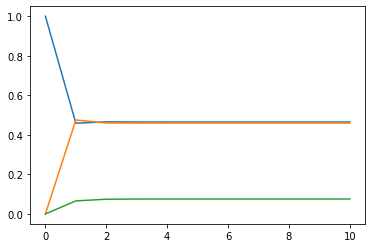

In [145]:
plt.plot(statehist)
plt.show()

In [146]:
statehist[-1]

array([0.46494514, 0.4596739 , 0.07538097])